Problem 1 - (a)

학습데이터 X가 입력되며, 각 층에서는 가중치(weights)와 함께 연산이 이루어져 data transformation이 이루어진다. 이 과정을 통해 예측값 Y'가 생성되며, 이는 실제값 Y와 함께 손실 함수(loss function)에 입력되어 실제값과 예측값의 차이인 loss score가 계산된다. loss score는 optimizer에 전달되어 loss score를 줄이기 위한 방향으로 네트워크의 가중치를 업데이트하고, 이 과정을 반복함으로서 예측 능력이 좋아지도록 학습된다.

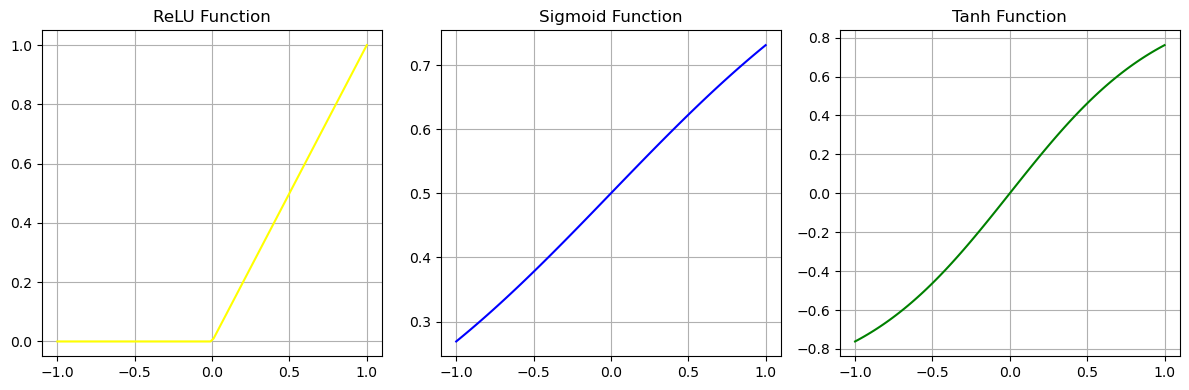

In [6]:
# Problem 1 - (b)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# 함수 값 계산
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

# 그래프 그리기
plt.figure(figsize=(12, 4))

# ReLU
plt.subplot(1, 3, 1)
plt.plot(x, y_relu, label='ReLU', color='yellow')
plt.title('ReLU Function')
plt.grid(True)

# Sigmoid
plt.subplot(1, 3, 2)
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.title('Tanh Function')
plt.grid(True)

plt.tight_layout()
plt.show()


1. ReLU 함수 -> g(z) = max(0, z)
연산이 간단하고 학습이 빨라 기본 활성화 함수가 되었다. 연속적이지만 z = 0에서 미분가능하지 않아서, 기울기가 갑자기 변할 수 있는 문제점이 있다. 출력에 최댓값이 없기 때문에 경사 하강법에 있는 일부 문제를 해결해준다.
2. Sigmoid 함수 -> g(z) = 1/(1 + exp(-z))
출력이 0과 1의 값을 가지기 때문에 이진 분류에 적합하다. 하지만 gradient가 0에 수렴하는 구간이 있어 vanishing gradient 문제가 발생할 수 있다.
3. Tanh 함수 -> g(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))
sigmoid function처럼 S자 모양이고 연속적이며 미분가능하다. 출력 범위가 -1에서 1 사이이므로 sigmoid보다 출력을 원점 근처로 모을 수 있다. Tanh 역시 vanishing gradient 문제가 발생할 수 있다.

Problem 1 - (c)

스팸 메일을 분류할 때, '스팸 메일'과 '정상 메일', 두 가지 클래스로 나누기 때문에 이진 분류 문제이다. 때문에 하나의 출력 뉴련이 필요하다.
출력층에 사용하는 함수는 Sigmoid 함수로, 출력값이 0과 1 사이의 값을 가지기 때문에 이진 분류 문제에 적합하기 때문이다.

Problem 1 - (d)

데이터의 dimension이 (100, 10)일 때, sample의 개수가 100개이고 feature의 수가 10이다. feature 중 하나는 target이므로 입력 feature는 10-1=9개이다.
따라서, input layer를 정의할 때, 뉴런의 개수는 9개여야 한다.

Problem 1 - (e)

배치 사이즈(batch size)는 전체 훈련 데이터 셋을 여러 작은 그룹으로 나누었을 때 하나의 소그룹에 해당하는 데이터 수를 의미한다. 즉, 데이터 셋 전체를 한 번에 네트워크에 넣을 경우 학습 시간이 오래 걸리기 때문에, 데이터 셋을 몇 개씩 나눌어 네트워크에 넣을지를 의미한다.
에포크(epoch)는 전체 훈련 데이터 셋이 신경망을 통과한 횟수를 의미한다. 1-epoch는 전체 훈련 셋이 하나의 신경망에 모두 전달되어 학습이 한 번 완료되었다는 것을 의미한다.
예를 들어, 전체 데이터 셋이 100개이고 배치 사이즈가 10이면, 1-epoch에 10번의 업데이트가 발생한다.

Problem 1 - (f)

In [10]:
# Problem 2 - (a)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("regression_data.csv")

categorical_cols = ['season', 'mnth', 'weekday', 'weathersit']

df1 = pd.get_dummies(df1, columns=categorical_cols, prefix=categorical_cols)

df1

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.805833,0.160446,985,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0.363478,0.696087,0.248539,801,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0,0,0.196364,0.437273,0.248309,1349,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,0.200000,0.590435,0.160296,1562,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,0.226957,0.436957,0.186900,1600,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0.254167,0.652917,0.350133,2114,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
727,1,0,0.253333,0.590000,0.155471,3095,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
728,1,0,0.253333,0.752917,0.124383,1341,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
729,1,0,0.255833,0.483333,0.350754,1796,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [12]:
# Problem 2 - (b)

# target 칼럼 =  cnt
y = df1['cnt']

# features
X = df1.drop('cnt', axis = 1)

# print
print("X : ", X.columns)
print("y : ", y.name)

X :  Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2',
       'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')
y :  cnt


In [16]:
# Problem 2 - (c)

# import dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

# numeric X에 대해 standardization
standard_scaler = preprocessing.StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

# result
print("X_train_scaled : ", X_train_scaled.shape)
print("X_test_scaled : ", X_test_scaled.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train_scaled :  (548, 31)
X_test_scaled :  (183, 31)
y_train :  (548,)
y_test :  (183,)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


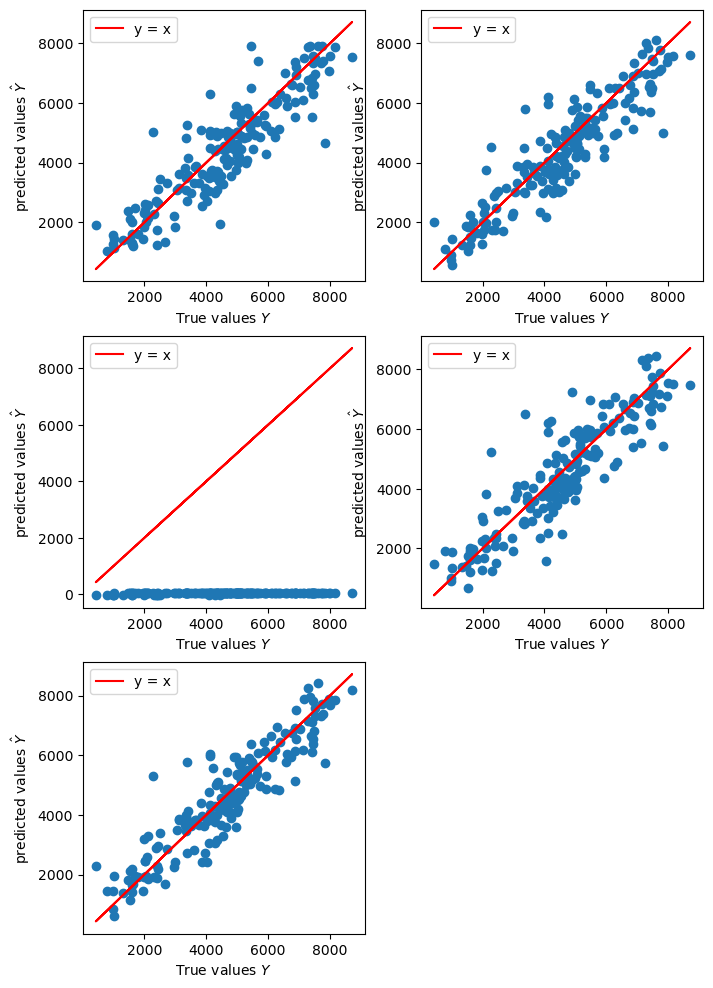

In [24]:
### Problem 2 - (d)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# model1 -> 은닉층 개수 2개, 활성화 함수 relu, input layer의 뉴런 개수 64개, optimizer adam
# 에포크 100번, 배치사이즈 32
model1 = Sequential([
    # input layer
    Dense(64, activation="relu", input_dim = X_train_scaled.shape[1]),

    # hidden layer
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),

    # output layer
    Dense(1, activation="linear")
])
# model1 compile
model1.compile(optimizer = "adam", loss="mse", metrics=["mse"])
# model1 fitting
model1.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model 2 -> 은닉층 개수 4개, 활성화 함수 relu, input layer의 뉴런 개수 256개, optimizer adam
# 에포크 100번, 배치사이즈 32
model2 = Sequential([
    # input layer
    Dense(256, activation="relu", input_dim = X_train_scaled.shape[1]),

    # hidden layer
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),

    # output layer
    Dense(1, activation="linear")
])
# model2 compile
model2.compile(optimizer = "adam", loss="mse", metrics=["mse"])
# model2 fitting
model2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model 3 -> 은닉층 개수 4개, 활성화 함수 tanh, input layer의 뉴런 개수 256개, optimizer adam
# 에포크 100번, 배치사이즈 32                                                                             
model3 = Sequential([
    # input layer
    Dense(256, activation="tanh", input_dim = X_train_scaled.shape[1]),

    # hidden layer
    Dense(128, activation="tanh"),
    Dense(64, activation="tanh"),
    Dense(32, activation="tanh"),
    Dense(16, activation="tanh"),

    # output layer
    Dense(1, activation="linear")
])
# model3 compile
model3.compile(optimizer = "adam", loss="mse", metrics=["mse"])
# model3 fitting
model3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model 4 -> 은닉층 개수 4개, 활성화 함수 relu, input layer의 뉴런 개수 256개, optimizer adam
# 에포크 500번, 배치사이즈 32
model4 = Sequential([
    # input layer
    Dense(256, activation="relu", input_dim = X_train_scaled.shape[1]),

    # hidden layer
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),

    # output layer
    Dense(1, activation="linear")
])
# model4 compile
model4.compile(optimizer = "adam", loss="mse", metrics=["mse"])
# model4 fitting
model4.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model 5 -> 은닉층 개수 4개, 활성화 함수 relu, input layer의 뉴런 개수 256개, optimizer adam
# 에포크 100번, 배치사이즈 16
model5 = Sequential([
    # input layer
    Dense(256, activation="relu", input_dim = X_train_scaled.shape[1]),

    # hidden layer
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),

    # output layer
    Dense(1, activation="linear")
])
# model5 compile
model5.compile(optimizer = "adam", loss="mse", metrics=["mse"])
# model5 fitting
model5.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=0)

plt.figure(figsize=(8, 12))

# model 1
plt.subplot(3, 2, 1)
plt.scatter(y_test, model1.predict(X_test_scaled))
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.xlabel("True values $Y$")
plt.ylabel("predicted values $\\hat{Y}$")
plt.legend()

# model 2
plt.subplot(3, 2, 2)
plt.scatter(y_test, model2.predict(X_test_scaled))
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.xlabel("True values $Y$")
plt.ylabel("predicted values $\\hat{Y}$")
plt.legend()

# model 3
plt.subplot(3, 2, 3)
plt.scatter(y_test, model3.predict(X_test_scaled))
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.xlabel("True values $Y$")
plt.ylabel("predicted values $\\hat{Y}$")
plt.legend()

# model 4
plt.subplot(3, 2, 4)
plt.scatter(y_test, model4.predict(X_test_scaled))
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.xlabel("True values $Y$")
plt.ylabel("predicted values $\\hat{Y}$")
plt.legend()

# model 5
plt.subplot(3, 2, 5)
plt.scatter(y_test, model5.predict(X_test_scaled))
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.xlabel("True values $Y$")
plt.ylabel("predicted values $\\hat{Y}$")
plt.legend()

plt.show()

In [26]:
# Problem 2 - (e)

from sklearn.metrics import r2_score

# R² 계산
r2_1 = r2_score(y_test, model1.predict(X_test_scaled))
r2_2 = r2_score(y_test, model2.predict(X_test_scaled))
r2_3 = r2_score(y_test, model3.predict(X_test_scaled))
r2_4 = r2_score(y_test, model4.predict(X_test_scaled))
r2_5 = r2_score(y_test, model5.predict(X_test_scaled))

# 결과 출력
print(f"Model 1 R2: {r2_1:.4f}")
print(f"Model 2 R2: {r2_2:.4f}")
print(f"Model 3 R2: {r2_3:.4f}")
print(f"Model 4 R2: {r2_4:.4f}")
print(f"Model 5 R2: {r2_5:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Model 1 R2: 0.8021
Model 2 R2: 0.8200
Model 3 R2: -6.0666
Model 4 R2: 0.7871
Model 5 R2: 0.8441


모델 5의 R2 값이 0.8441로, 모델 5의 성능이 가장 좋다.

In [52]:
# Problem 3 - (a)

# import library
from sklearn.preprocessing import LabelEncoder

df2 = pd.read_csv('classification_data.csv', sep=';')

# categorical variable만 추출
categorical_cols = df2.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('y')

# binary 변수는 label encoding
binary_cols = ['default', 'housing', 'loan']
le = LabelEncoder()
for col in binary_cols:
    df2[col] = le.fit_transform(df2[col])

# binary 변수를 제외한 categorial 변수는 one-hot encoding
onehot_cols = [col for col in categorical_cols if col not in binary_cols]

df2 = pd.get_dummies(df2, columns=onehot_cols, prefix = onehot_cols)

# target 변수 one-hot encoding
df2 = pd.get_dummies(df2, columns=['y'], prefix = 'y')

# 결과 출력
df2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,0,1787,0,0,19,79,1,-1,0,...,False,False,True,False,False,False,False,True,True,False
1,33,0,4789,1,1,11,220,1,339,4,...,True,False,False,False,True,False,False,False,True,False
2,35,0,1350,1,0,16,185,1,330,1,...,False,False,False,False,True,False,False,False,True,False
3,30,0,1476,1,1,3,199,4,-1,0,...,False,False,False,False,False,False,False,True,True,False
4,59,0,0,1,0,5,226,1,-1,0,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,False,False,False,False,False,False,False,True,True,False
4517,57,1,-3313,1,1,9,153,1,-1,0,...,True,False,False,False,False,False,False,True,True,False
4518,57,0,295,0,0,19,151,11,-1,0,...,False,False,False,False,False,False,False,True,True,False
4519,28,0,1137,0,0,6,129,4,211,3,...,False,False,False,False,False,True,False,False,True,False


In [55]:
# Problem 3 - (b)

# one-hot 된 y 컬럼 선택
y = df2[['y_no', 'y_yes']] 

# 나머지를 X로
X = df2.drop(columns=['y_no', 'y_yes']) 

# print
print("X : ", X.columns)
print("y : ", y.columns)

X :  Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
y :  Index(['y_no', 'y_yes'], dtype='object')


In [56]:
# Problem 3 - (c)

# import dataset
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

# numeric X에 대해 standardization
standard_scaler = preprocessing.StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

# result
print("X_train_scaled : ", X_train_scaled.shape)
print("X_test_scaled : ", X_test_scaled.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train_scaled :  (3390, 48)
X_test_scaled :  (1131, 48)
y_train :  (3390, 2)
y_test :  (1131, 2)


In [59]:
# Problem 3 - (d)

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# model1 -> 은닉층 개수 2개, 활성화 함수 relu, input layer의 뉴런 개수 48개, optimizer adam
# 에포크 25번, 배치사이즈 32
model1 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # input layer
    Dense(units=48, activation="relu"),

    # hidden layer
    Dense(units=24, activation="relu"),
    Dense(units=12, activation="relu"),

    # output layer
    Dense(units=2, activation="softmax")
])
# model1 compile
model1.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model1 fitting
model1.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model2 -> 은닉층 개수 4개, 활성화 함수 relu, input layer의 뉴런 개수 192개, optimizer adam
# 에포크 25번, 배치사이즈 32
model2 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # input layer
    Dense(units=192, activation="relu"),

    # hidden layer
    Dense(units=96, activation="relu"),
    Dense(units=48, activation="relu"),
    Dense(units=24, activation="relu"),
    Dense(units=12, activation="relu"),

    # output layer
    Dense(units=2, activation="softmax")
])
# model2 compile
model2.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model2 fitting
model2.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model3 -> 은닉층 개수 2개, 활성화 함수 relu, input layer의 뉴런 개수 48개, optimizer adam
# 에포크 50번, 배치사이즈 32
model3 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # input layer
    Dense(units=48, activation="relu"),

    # hidden layer
    Dense(units=24, activation="relu"),
    Dense(units=12, activation="relu"),

    # output layer
    Dense(units=2, activation="softmax")
])
# model3 compile
model3.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model3 fitting
model3.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model4 -> 은닉층 개수 2개, 활성화 함수 sigmoid, input layer의 뉴런 개수 48개, optimizer adam
# 에포크 25번, 배치사이즈 32
model4 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # input layer
    Dense(units=48, activation="sigmoid"),

    # hidden layer
    Dense(units=24, activation="sigmoid"),
    Dense(units=12, activation="sigmoid"),

    # output layer
    Dense(units=2, activation="softmax")
])
# model4 compile
model4.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model4 fitting
model4.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# model5 -> 은닉층 개수 4개, 활성화 함수 relu, input layer의 뉴런 개수 96개, optimizer adam
# 에포크 25번, 배치사이즈 32
model5 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # input layer
    Dense(units=96, activation="relu"),

    # hidden layer
    Dense(units=48, activation="relu"),
    Dense(units=24, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=8, activation="relu"),

    # output layer
    Dense(units=2, activation="softmax")
])
# model5 compile
model5.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model5 fitting
model5.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

loss1, acc1 = model1.evaluate(X_test_scaled, y_test)
loss2, acc2 = model2.evaluate(X_test_scaled, y_test)
loss3, acc3 = model3.evaluate(X_test_scaled, y_test)
loss4, acc4 = model4.evaluate(X_test_scaled, y_test)
loss5, acc5 = model5.evaluate(X_test_scaled, y_test)

# 결과 출력
print(f"Model 1 acc: {acc1:.4f}")
print(f"Model 2 acc: {acc2:.4f}")
print(f"Model 3 acc: {acc3:.4f}")
print(f"Model 4 acc: {acc4:.4f}")
print(f"Model 5 acc: {acc5:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.4779
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.5796
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.7672
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8889 - loss: 0.2408
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.6651
Model 1 acc: 0.8753
Model 2 acc: 0.8780
Model 3 acc: 0.8656
Model 4 acc: 0.8877
Model 5 acc: 0.8700


In [65]:
# Problem 3 - (e)

from sklearn.metrics import confusion_matrix
import numpy as np

# y_test가 one-hot 인코딩된 경우 → 정수 라벨로 변환
y_test_labels = np.argmax(y_test, axis=1)

# 각 모델 예측 결과를 정수 라벨로 변환
y_pred1 = np.argmax(model1.predict(X_test_scaled), axis=1)
y_pred2 = np.argmax(model2.predict(X_test_scaled), axis=1)
y_pred3 = np.argmax(model3.predict(X_test_scaled), axis=1)
y_pred4 = np.argmax(model4.predict(X_test_scaled), axis=1)
y_pred5 = np.argmax(model5.predict(X_test_scaled), axis=1)

# confusion matrix와 classification report 출력
for i, (y_pred, model_name) in enumerate(zip(
    [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5],
    ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
)):
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 Confusion Matrix:
[[947  67]
 [ 74  43]]
Model 2 Confusion Matrix:
[[951  63]
 [ 75  42]]
Model 3 Confusion Matrix:
[[933  81]
 [ 71  46]]
Model 4 Confusion Matrix:
[[952  62]
 [ 65  52]]
Model 5 Confusion Matrix:
[[935  79]
 [ 68  49]]


Model 4가 올바르게 예측한 수가 952 + 52 = 1004로 가장 많으므로, 모델 4이 성능이 가장 좋다고 할 수 있다.